# Dataset Airbnb - Amsterdam

In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

Als eerste stap willen we een kijkje nemen in de dataset, om vervolgens onnodige data, rijen of kollomen te verwijderen.

In [2]:
df = pd.read_csv("airbnb.csv")
df.head(30) #show a bit more of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.364350,4.94358,Private room,59.0,3.0,282,2019-11-21,2.83,1.0,33.0,4,0363 5F3A 5684 6750 D14D;
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.364070,4.89393,Private room,106.0,1.0,339,2020-03-27,3.57,2.0,0.0,0,0363 CBB3 2C10 0C2A 1E29;
2,"27886,""Romantic, stylish B&B houseboat in cana...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367750,4.89092,Private room,75.0,2.0,364,2021-10-15,4.62,2.0,267.0,28,0363 607B EA74 0BD8 2F6F;
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.365840,4.89111,Private room,55.0,2.0,509,2021-10-09,5.52,2.0,282.0,30,0363 607B EA74 0BD8 2F6F;
5,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,NaN,Centrum-Oost,52.371680,4.91471,Entire home/apt,240.0,3.0,41,2019-09-22,0.61,1.0,0.0,2,0363 E76E F06A C1DD 172C;
6,47061,Charming apartment in old centre,211696,Ivar,NaN,De Baarsjes - Oud-West,52.367860,4.87458,Entire home/apt,120.0,2.0,184,2019-04-03,1.56,1.0,178.0,2,0363 1266 8C04 4133 E6AC;
7,49552,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP,NaN,Centrum-West,52.380280,4.89089,Entire home/apt,157.0,3.0,384,2021-10-31,3.63,1.0,0.0,16,0363 576A D827 5085 6B83;
8,49790,Luxurous Houseboat-Great Location,227530,Klaas,NaN,De Baarsjes - Oud-West,52.361580,4.86101,Entire home/apt,250.0,3.0,105,2019-05-14,0.83,1.0,0.0,2,0363 4574 0059 C89C 0671;
9,50523,B & B de 9 Straatjes (city center),231946,Raymond,NaN,Centrum-West,52.368110,4.88262,Private room,118.0,2.0,310,2020-02-21,2.50,1.0,332.0,3,0363 22DC 0E52 B70B 0FB8;


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5408 non-null   object 
 1   name                            4576 non-null   object 
 2   host_id                         4576 non-null   object 
 3   host_name                       4573 non-null   object 
 4   neighbourhood_group             2 non-null      object 
 5   neighbourhood                   4576 non-null   object 
 6   latitude                        4576 non-null   float64
 7   longitude                       4576 non-null   object 
 8   room_type                       4576 non-null   object 
 9   price                           4576 non-null   float64
 10  minimum_nights                  4576 non-null   float64
 11  number_of_reviews               4576 non-null   object 
 12  last_review                     41

Er zijn veel NAN aangetroffen in de kollom 'neighbourhood_group' daarom is er gekozen om deze rij te verwijderen. Ook omdat er nog een andere kolom bestaat die de neighbourhood aangeeft. Daarnaast zullen alle rijen met nan worden gedropt omdat in dat relatief weinig rijen zijn. ook de kolommen 'id','host_id','name','host_name','latitude','longitude','license; zijn niet relevant voor het bepalen van de prijs. Daarom worden deze rijen ook verwijderd.

In [4]:
subset_drop=['neighbourhood_group','id','host_id','name','host_name','latitude','longitude','license;']
df=df.drop(columns=subset_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   4576 non-null   object 
 1   room_type                       4576 non-null   object 
 2   price                           4576 non-null   float64
 3   minimum_nights                  4576 non-null   float64
 4   number_of_reviews               4576 non-null   object 
 5   last_review                     4173 non-null   object 
 6   reviews_per_month               4173 non-null   float64
 7   calculated_host_listings_count  4576 non-null   float64
 8   availability_365                4576 non-null   float64
 9   number_of_reviews_ltm           4576 non-null   object 
dtypes: float64(5), object(5)
memory usage: 422.6+ KB


In [5]:
df= df.dropna()

In [6]:
df.info()
df.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4173 entries, 0 to 5392
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   4173 non-null   object 
 1   room_type                       4173 non-null   object 
 2   price                           4173 non-null   float64
 3   minimum_nights                  4173 non-null   float64
 4   number_of_reviews               4173 non-null   object 
 5   last_review                     4173 non-null   object 
 6   reviews_per_month               4173 non-null   float64
 7   calculated_host_listings_count  4173 non-null   float64
 8   availability_365                4173 non-null   float64
 9   number_of_reviews_ltm           4173 non-null   object 
dtypes: float64(5), object(5)
memory usage: 358.6+ KB


,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Oostelijk Havengebied - Indische Buurt,Private room,59.0,3.0,282,2019-11-21,2.83,1.0,33.0,4
1,Centrum-Oost,Private room,106.0,1.0,339,2020-03-27,3.57,2.0,0.0,0
3,Centrum-West,Private room,75.0,2.0,364,2021-10-15,4.62,2.0,267.0,28
4,Centrum-Oost,Private room,55.0,2.0,509,2021-10-09,5.52,2.0,282.0,30
5,Centrum-Oost,Entire home/apt,240.0,3.0,41,2019-09-22,0.61,1.0,0.0,2
6,De Baarsjes - Oud-West,Entire home/apt,120.0,2.0,184,2019-04-03,1.56,1.0,178.0,2
7,Centrum-West,Entire home/apt,157.0,3.0,384,2021-10-31,3.63,1.0,0.0,16
8,De Baarsjes - Oud-West,Entire home/apt,250.0,3.0,105,2019-05-14,0.83,1.0,0.0,2
9,Centrum-West,Private room,118.0,2.0,310,2020-02-21,2.50,1.0,332.0,3
11,Centrum-Oost,Entire home/apt,100.0,4.0,61,2021-05-23,0.59,1.0,39.0,2


<AxesSubplot:xlabel='price', ylabel='Count'>

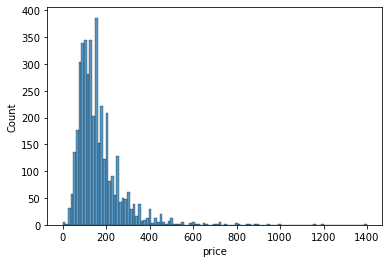

In [7]:
sns.histplot(x='price', data= df)

In [8]:
df.describe()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,164.196022,3.980590,1.445667,2.201773,100.694464
std,105.209766,28.028883,2.895472,3.404924,126.479891
min,0.000000,1.000000,0.010000,0.000000,0.000000
25%,99.000000,2.000000,0.310000,1.000000,0.000000
50%,140.000000,2.000000,0.670000,1.000000,29.000000
75%,199.000000,3.000000,1.680000,2.000000,191.000000
max,1399.000000,1001.000000,102.600000,63.000000,365.000000


Er zijn prijzen Airbnb's die voor 0 euro gehuurd kunnen worden, dit is natuurlijk niet mogelijk. Daarom worden alle rijen met een prijs onder de 5 euro verwijderd. Er zijn ook enkele hoge uitschieters bij de prijs, om het model beter te maken worden deze ook verwijderd. Het gaat hierbij om prijzen boven de 600 euro per nacht. Deze keuze is gemaakt om het model dus betrouwbaarder te maken.

<AxesSubplot:xlabel='price', ylabel='Count'>

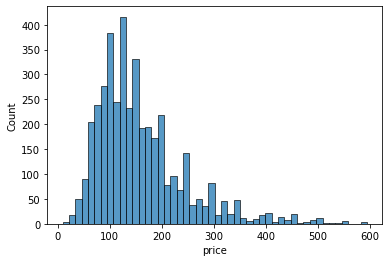

In [9]:
df=df[df['price']>5]
df=df[df['price']<600]
df.describe()
sns.histplot(x='price', data= df)

In [10]:
df.corr()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.012992,-0.130255,-0.012609,0.018791
minimum_nights,-0.012992,1.000000,-0.013567,-0.016960,-0.017613
reviews_per_month,-0.130255,-0.013567,1.000000,0.095679,0.229637
calculated_host_listings_count,-0.012609,-0.016960,0.095679,1.000000,0.247024
availability_365,0.018791,-0.017613,0.229637,0.247024,1.000000


ook opvallend is dat het hoogste minum aantal nachten 1001 is. dit is erg onwaarschijnlijk dat je voor 3 jaar een huis moet huren.

<AxesSubplot:xlabel='minimum_nights'>

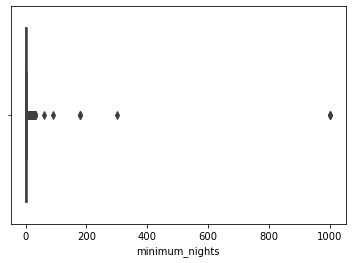

In [11]:
sns.boxplot(x='minimum_nights', data= df)

In de boxplot kan worden waargenomendat er veel hoge uitschieters zijn als het gaat om het minimum aantal nachten dat een gast moet blijven in een airbnb. Zulke hoge aantallen is onwaarschijnlijk en worden daarom ook uit de dataset verwijderd.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047 entries, 0 to 5392
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   4047 non-null   object 
 1   room_type                       4047 non-null   object 
 2   price                           4047 non-null   float64
 3   minimum_nights                  4047 non-null   float64
 4   number_of_reviews               4047 non-null   object 
 5   last_review                     4047 non-null   object 
 6   reviews_per_month               4047 non-null   float64
 7   calculated_host_listings_count  4047 non-null   float64
 8   availability_365                4047 non-null   float64
 9   number_of_reviews_ltm           4047 non-null   object 
dtypes: float64(5), object(5)
memory usage: 347.8+ KB


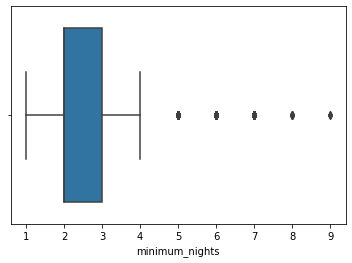

In [12]:
df=df[df['minimum_nights']<10]
sns.boxplot(x='minimum_nights', data= df)
df.info()

In [13]:
df=df[df['availability_365']>0]
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 5392
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   2617 non-null   object 
 1   room_type                       2617 non-null   object 
 2   price                           2617 non-null   float64
 3   minimum_nights                  2617 non-null   float64
 4   number_of_reviews               2617 non-null   object 
 5   last_review                     2617 non-null   object 
 6   reviews_per_month               2617 non-null   float64
 7   calculated_host_listings_count  2617 non-null   float64
 8   availability_365                2617 non-null   float64
 9   number_of_reviews_ltm           2617 non-null   object 
dtypes: float64(5), object(5)
memory usage: 224.9+ KB


,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Oostelijk Havengebied - Indische Buurt,Private room,59.0,3.0,282,2019-11-21,2.83,1.0,33.0,4
3,Centrum-West,Private room,75.0,2.0,364,2021-10-15,4.62,2.0,267.0,28
4,Centrum-Oost,Private room,55.0,2.0,509,2021-10-09,5.52,2.0,282.0,30
6,De Baarsjes - Oud-West,Entire home/apt,120.0,2.0,184,2019-04-03,1.56,1.0,178.0,2
9,Centrum-West,Private room,118.0,2.0,310,2020-02-21,2.50,1.0,332.0,3


In [14]:
df.corr()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.188111,-0.160300,-0.006846,-0.017592
minimum_nights,0.188111,1.000000,-0.170248,-0.075974,-0.176980
reviews_per_month,-0.160300,-0.170248,1.000000,0.059735,0.159843
calculated_host_listings_count,-0.006846,-0.075974,0.059735,1.000000,0.222662
availability_365,-0.017592,-0.176980,0.159843,0.222662,1.000000


In [15]:
df.value_counts('room_type')

room_type
Entire home/apt    1453
Private room       1098
Hotel room           59
Shared room           6
75                    1
dtype: int64

In [16]:
df= df[df['room_type'] != '75']
df.value_counts('room_type')

room_type
Entire home/apt    1453
Private room       1098
Hotel room           59
Shared room           6
dtype: int64

In [17]:
df.value_counts('calculated_host_listings_count')

calculated_host_listings_count
1.0     1682
2.0      370
3.0      139
4.0       74
6.0       73
5.0       54
7.0       38
9.0       33
8.0       30
12.0      21
21.0      20
20.0      19
19.0      16
22.0      11
16.0      10
10.0      10
15.0       9
11.0       7
dtype: int64

In [25]:
df=pd.get_dummies(df, columns=['neighbourhood'], drop_first= True)



KeyError: "None of [Index(['neighbourhood'], dtype='object')] are in the [columns]"